# Google Colab y Google Drive

En esta clase trabajaremos utilizando **Google Colab** como entorno de programación. Además, guardaremos y gestionaremos nuestros archivos a través de **Google Drive** y exploraremos cómo integrar proyectos con **GitHub** para un mejor control de versiones y colaboración.

## Objetivos

- Ejecutar notebooks en Google Colab.
- Montar Google Drive para guardar y acceder a archivos.
- Conectar Google Colab con repositorios de GitHub.

---

✅ **Recomendaciones iniciales:**
- Asegúrate de tener una cuenta activa de Google.
- Autoriza el acceso de Colab a tu Google Drive cuando se te solicite.
- Si aún no tienes cuenta en GitHub, crea una y familiarízate con su interfaz básica.


In [1]:
# Nos conectamos al Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os

# Cambiar el directorio de trabajo
os.chdir('/content/drive/My Drive/UPAO/input')

# Mostrar el directorio actual de trabajo
print("Directorio actual:", os.getcwd())

# Listar todos los archivos y carpetas en el directorio actual
print("\nArchivos y carpetas en el directorio actual:")
print(os.listdir())

!ls "/content/drive/My Drive/UPAO/input"

Directorio actual: /content/drive/My Drive/UPAO/input

Archivos y carpetas en el directorio actual:
['enaho.dta']
enaho.dta


La siguiente tabla resume las mejores prácticas para elegir gráficos adecuados según el objetivo de análisis y la naturaleza de los datos. Esta selección es fundamental para representar la información de manera clara y efectiva, facilitando la interpretación de resultados.

| **Objetivo**                             | **Tipo de datos**               | **Gráficos recomendados**                                               |
| ---------------------------------------- | ------------------------------- | ----------------------------------------------------------------------- |
| Distribución de una variable             | Numérica continua o discreta    | Histograma, Densidad Kernel (KDE), Diagrama de cajas                    |
| Comparar categorías                      | Categórica vs. Numérica         | Diagrama de cajas, Diagrama de violín, Diagrama de barras               |
| Comparar valores según categoría         | Categórica nominal vs. Numérica | Diagrama de barras, Gráfico de conteo                                   |
| Tendencias temporales                    | Fecha + Variable numérica       | Gráfico de líneas                                                       |
| Correlación entre dos variables          | Dos variables numéricas         | Diagrama de dispersión, Mapa de calor (para múltiples variables)        |
| Relación entre dos variables categóricas | Dos variables categóricas       | Mapa de calor, Gráfico de conteo con diferenciación por tonalidad (hue) |


## Descripción de la base de datos

La base de datos que utilizaremos a continuación contiene información proveniente de la **Encuesta Nacional de Hogares (ENAHO)**, correspondiente a los módulos 200, 300 y 500, para el periodo 2011 - 2019. Esta base de datos permite realizar un análisis multidimensional de las características de los hogares peruanos a lo largo del tiempo.

- **Módulo 200: Características de los Miembros del Hogar**
  
  Incluye variables demográficas esenciales, tales como edad, sexo, parentesco con el jefe del hogar, estado civil y otros indicadores relevantes sobre la composición familiar.

- **Módulo 300: Educación**
  
  Proporciona información detallada sobre el nivel educativo alcanzado, asistencia escolar, rezago escolar, entre otros aspectos relacionados con la educación de los miembros del hogar.

- **Módulo 500: Empleo e Ingresos**
  
  Recoge datos sobre la condición de actividad, características del empleo principal y secundario, ingresos laborales y no laborales, permitiendo un análisis integral del mercado laboral y la situación económica de los hogares.

Esta base de datos constituye una herramienta robusta para el estudio de temas relacionados con desarrollo humano, pobreza, desigualdad, y dinámicas del mercado de trabajo en el Perú.


In [3]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Importar la base de datos ENAHO y asignarla al DataFrame 'df'
df = pd.read_stata("enaho.dta")

# Mostrar las primeras filas para verificar la correcta importación
df.head()


,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
0,2011,0061,077,11,010701,04,selva,"de 4,001 a 10,000 viviendas",2.011006e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,2.0,4.0,NaN,361.0,familiar,010000
1,2011,0110,112,11,010705,05,selva,Área de empadronamiento rural - aer compuesto,2.011011e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,9.0,400.0,familiar,010000
2,2011,0090,076,11,010205,03,selva,Área de empadronamiento rural - aer compuesto,2.011009e+14,nieto,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,36.0,484.0,familiar,010000
3,2011,0118,080,11,010401,03,selva,Área de empadronamiento rural - aer simple,2.011012e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,NaN,529.0,familiar,010000
4,2011,3408,066,11,010402,03,selva,Área de empadronamiento rural - aer compuesto,2.011341e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,0.0,400.0,familiar,010000


In [4]:
df['empresa']

,empresa
0,NaN
1,microempresa
2,microempresa
3,NaN
4,gran empresa
...,...
160767,NaN
160768,microempresa
160769,mediana empresa
160770,NaN


## Clasificación de empresas según el número de trabajadores contratados

A continuación, se presenta la clasificación empresarial basada en el tamaño de la empresa, determinada por la cantidad de trabajadores contratados:

- **Microempresas:** menos de 10 trabajadores.
- **Pequeñas empresas:** entre 10 y 20 trabajadores.
- **Medianas empresas:** entre 21 y 100 trabajadores.
- **Grandes empresas:** más de 100 trabajadores.

Esta clasificación es ampliamente utilizada en estudios económicos y análisis sectoriales para segmentar y comparar el comportamiento empresarial según su tamaño.

---


<ipython-input-5-3998eedd0718>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x = sns.countplot( x="empresa", data=df[df['year'] == "2019"], palette="pastel")


Text(0, 0.5, 'Número de Observaciones ')

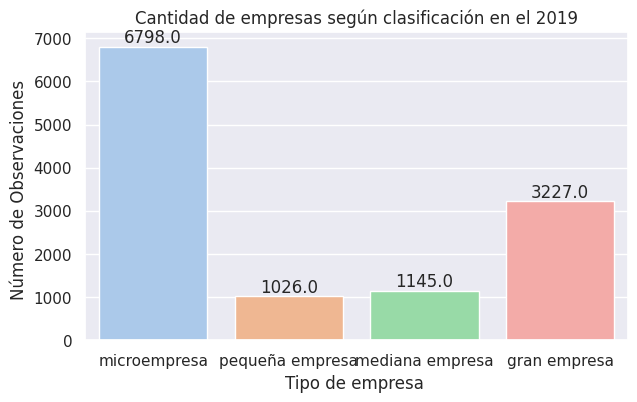

In [5]:
sns.set(style="darkgrid")
# sns.set(style="whitegrid")
# sns.set(style="white")
#figure size

fig, ax = plt.subplots( figsize=(7,4) )

x = sns.countplot( x="empresa", data=df[df['year'] == "2019"], palette="pastel")



# Iterar sobre las barras
for p in ax.patches:
    # Obtener la posición y la altura de la barra
    height = p.get_height()
    # Colocar el texto sobre la barra
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{}'.format(height), ha='center', va='bottom')

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Tipo de empresa ')
plt.ylabel('Número de Observaciones ')

# ax.grid(False)

###### Gráfico de recuento vertical y un color (rojo)

Text(0, 0.5, 'Tipo de empresa')

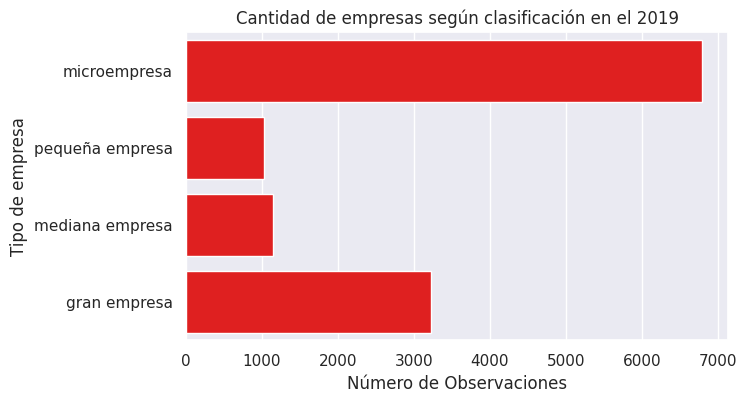

In [6]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7,4))

x = sns.countplot(y = "empresa", data=df[df['year'] == "2019" ], color = 'red')

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Número de Observaciones')
plt.ylabel('Tipo de empresa')

###### Evolución de las empresas en el périodo 2017-2019

Text(0.01, 0.01, 'Fuente: Elboración propia - ENAHO (2011-2019)')

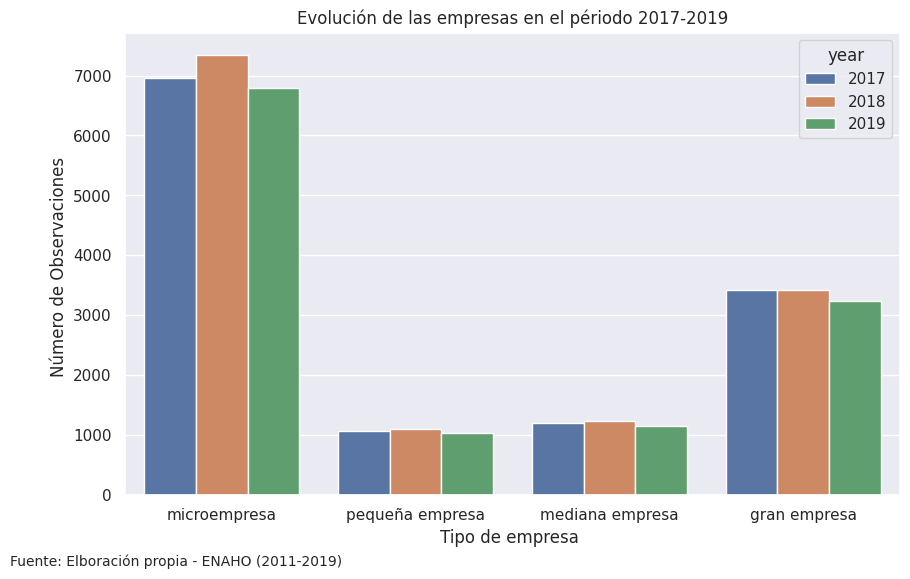

In [7]:
df2 = df[df['year'] > "2016" ]

fig, ax = plt.subplots(figsize=(10,6))

# hue: variable descomposition

ax = sns.countplot(x="empresa", hue="year", linewidth=1, data=df2)

plt.title('Evolución de las empresas en el périodo 2017-2019')
plt.xlabel('Tipo de empresa ')
plt.ylabel('Número de Observaciones ')

txt="Fuente: Elboración propia - ENAHO (2011-2019)"
plt.figtext(0.01, 0.01, txt, wrap=True, horizontalalignment='left', va="top", fontsize=10)


### Número de empresas por estratos (urbano o rural) y evolución por años

hue = divididos en grupos pero en el mismo gráfico <br>
col = crear dos nuevos grupos base en id grupo

In [8]:
df2.area

,area
103666,Urbana
103667,Rural
103668,Urbana
103669,Urbana
103670,Urbana
...,...
160767,Urbana
160768,Urbana
160769,Urbana
160770,Urbana


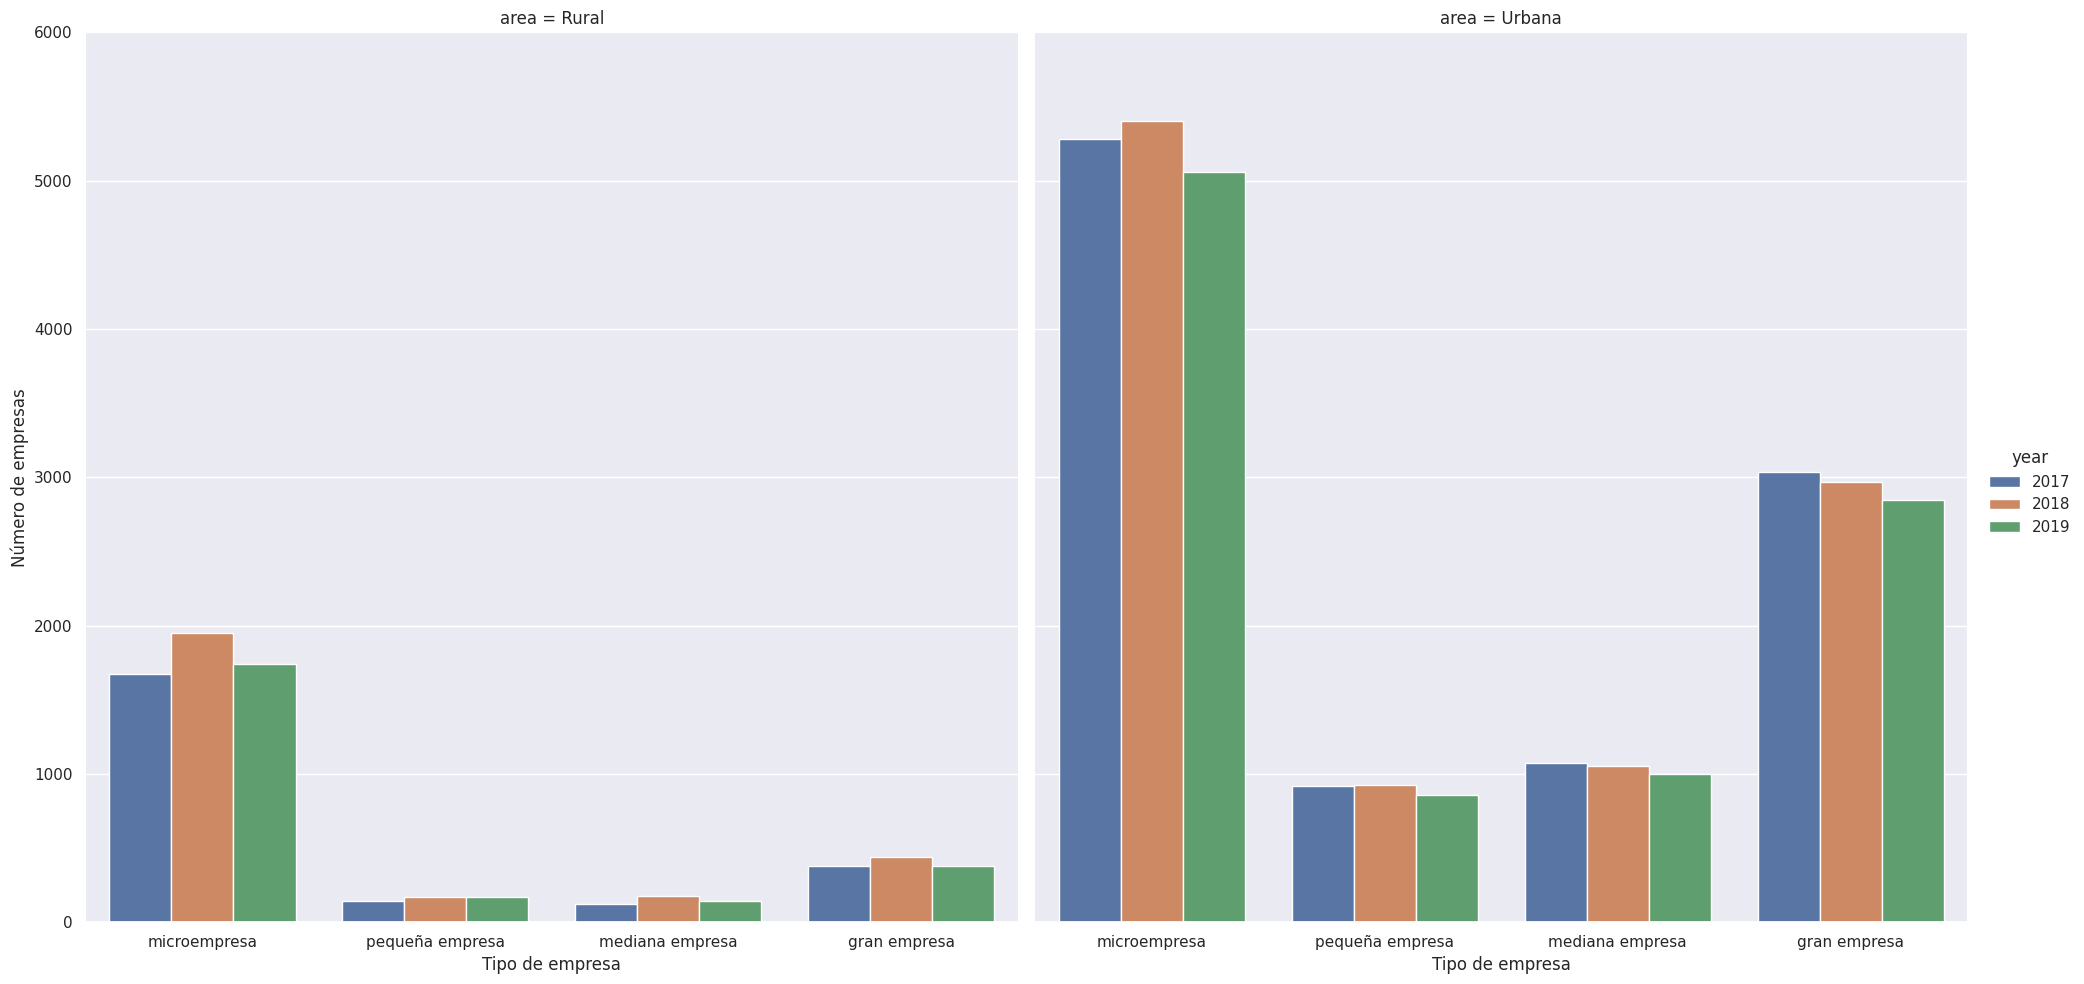

In [9]:
ag = sns.catplot(x="empresa", hue="year", col= "area" , data= df2, kind="count", height=10, aspect=1);

(ag.set_axis_labels("Tipo de empresa", "Número de empresas")
  .set(ylim=(0, 6000))
  .despine(left=True))

#### Número de empresas por estratos - diagrama de barras apiladas

In [10]:
df['conglome']

,conglome
0,0061
1,0110
2,0090
3,0118
4,3408
...,...
160767,009703
160768,009675
160769,009703
160770,009700


In [11]:
df[df['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')

<ipython-input-11-b1ff9a668bff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')


,empresa,area,num_firms
0,microempresa,Rural,1742
1,microempresa,Urbana,5056
2,pequeña empresa,Rural,169
3,pequeña empresa,Urbana,857
4,mediana empresa,Rural,145
5,mediana empresa,Urbana,1000
6,gran empresa,Rural,381
7,gran empresa,Urbana,2846


In [13]:
# count businesses by strata using groubpy (similar collapse - stata)
#base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ], as_index = False )[['conglome'] ].count()
base_2 = df[ df['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')
base_2

<ipython-input-13-d984ace35e34>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base_2 = df[ df['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')


,empresa,area,num_firms
0,microempresa,Rural,1742
1,microempresa,Urbana,5056
2,pequeña empresa,Rural,169
3,pequeña empresa,Urbana,857
4,mediana empresa,Rural,145
5,mediana empresa,Urbana,1000
6,gran empresa,Rural,381
7,gran empresa,Urbana,2846


In [14]:
# stacked information
base_3 = base_2.pivot(index = 'empresa', columns = 'area', values = 'num_firms')
base_3

area,Rural,Urbana
empresa,,
microempresa,1742,5056
pequeña empresa,169,857
mediana empresa,145,1000
gran empresa,381,2846


In [15]:
base_3.columns

CategoricalIndex(['Rural', 'Urbana'], categories=['Rural', 'Urbana'], ordered=True, dtype='category', name='area')

In [16]:
base_3_2 = base_3.copy()

In [17]:
base_3_2 = base_3_2[["Urbana", "Rural"]]
base_3_2

area,Urbana,Rural
empresa,,
microempresa,5056,1742
pequeña empresa,857,169
mediana empresa,1000,145
gran empresa,2846,381


Text(0.5, 0, ' ')

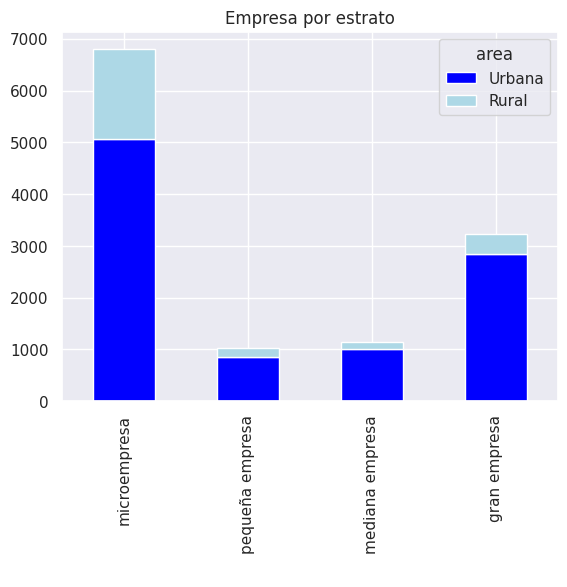

In [18]:
base_3_2.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

Text(0.5, 0, ' ')

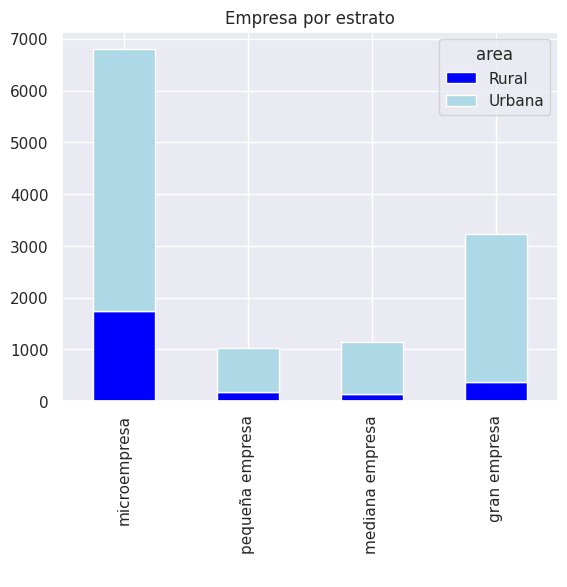

In [19]:
base_3.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'microempresa'),
  Text(1, 0, 'pequeña empresa'),
  Text(2, 0, 'mediana empresa'),
  Text(3, 0, 'gran empresa')])

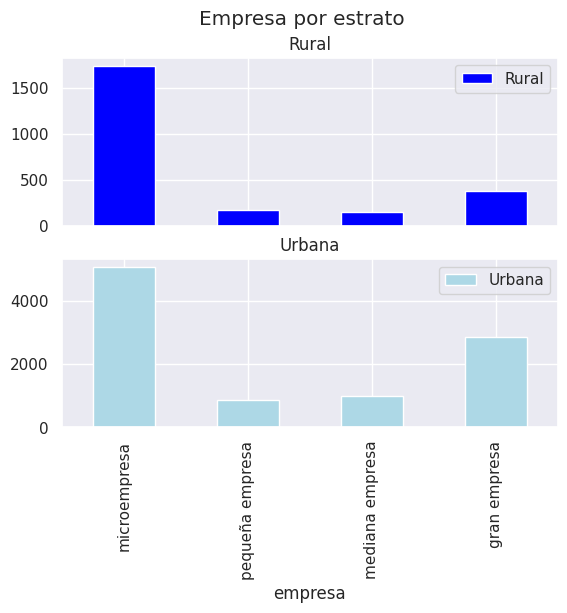

In [20]:
axes = base_3.plot( kind='bar', rot=0, subplots=True, color = ['blue', 'lightblue'], title='Empresa por estrato')
plt.xticks(rotation=90)

## 2. Proporciones

Gráficos comprensibles para mostrar variables categóricas. Utilice estos gráficos para explicar las participaciones de las categorías.

### Pie

##### First at all, collapse dataframe to count categories of a variable

In [21]:
base = df.groupby([ 'empresa' ]).count()
base

<ipython-input-21-e67966b986e9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base = df.groupby([ 'empresa' ]).count()


,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
empresa,,,,,,,,,,,,,,,,,,,,,
microempresa,58002,58002,58002,58002,58002,58002,58002,58002,58002,58002,...,57991,58002,57991,57991,57565,57565,58001,58002,58002,58002
pequeña empresa,9306,9306,9306,9306,9306,9306,9306,9306,9306,9306,...,9301,9306,9301,9301,9202,9202,9303,9306,9306,9306
mediana empresa,10304,10304,10304,10304,10304,10304,10304,10304,10304,10304,...,10302,10304,10302,10302,10212,10212,10304,10304,10304,10304
gran empresa,29642,29642,29642,29642,29642,29642,29642,29642,29642,29642,...,29639,29642,29639,29639,29392,29392,29640,29642,29642,29642


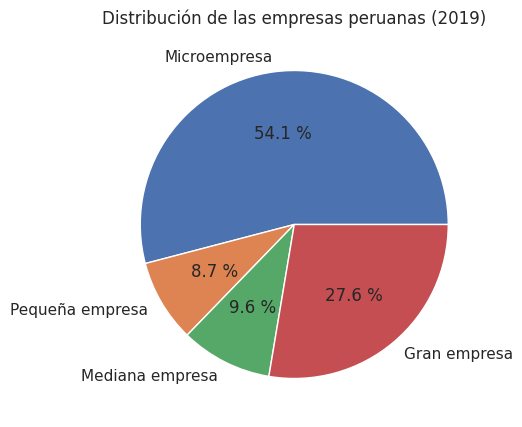

In [22]:
# Labels to correct categories names

labels=['Microempresa','Pequeña empresa' , 'Mediana empresa', 'Gran empresa']

plt.figure(figsize=(5,5))

ax = plt.pie(base['conglome'], labels=labels, autopct='%.1f %%')
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()

In [23]:
df.labor

,labor
0,NaN
1,Ocupaciones elementales
2,"Trabajo en actividades agrícolas, selvicultura..."
3,NaN
4,Trabajadores de ventas y en servicios
...,...
160767,NaN
160768,Ocupaciones elementales
160769,Operadores de planta y maquinaria
160770,NaN


In [24]:
base = df.groupby('labor').size()
base

<ipython-input-24-5b3b691e35e1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base = df.groupby('labor').size()


,0
labor,
Ocupaciones elementales,25556
Administradores,11310
Profesionales y fuerzas armadas,1958
Técnicos y similares,12414
Asistentes administrativos,14423
Trabajadores de ventas y en servicios,18691
"Trabajo en actividades agrícolas, selvicultura y pesca",5224
Trabajo en artesanía y afines,8648
Operadores de planta y maquinaria,11794


<ipython-input-25-798b43d72406>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base = df.groupby('labor').size()


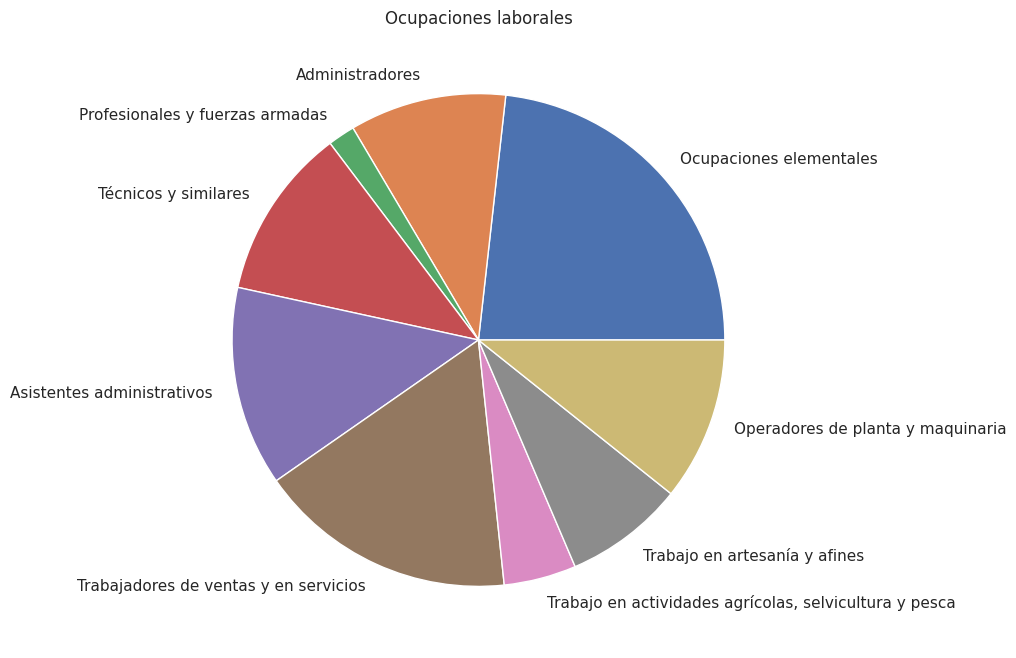

In [25]:
base = df.groupby('labor').size()
base.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

<ipython-input-26-2eac0de780eb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base = df.groupby('labor').size()


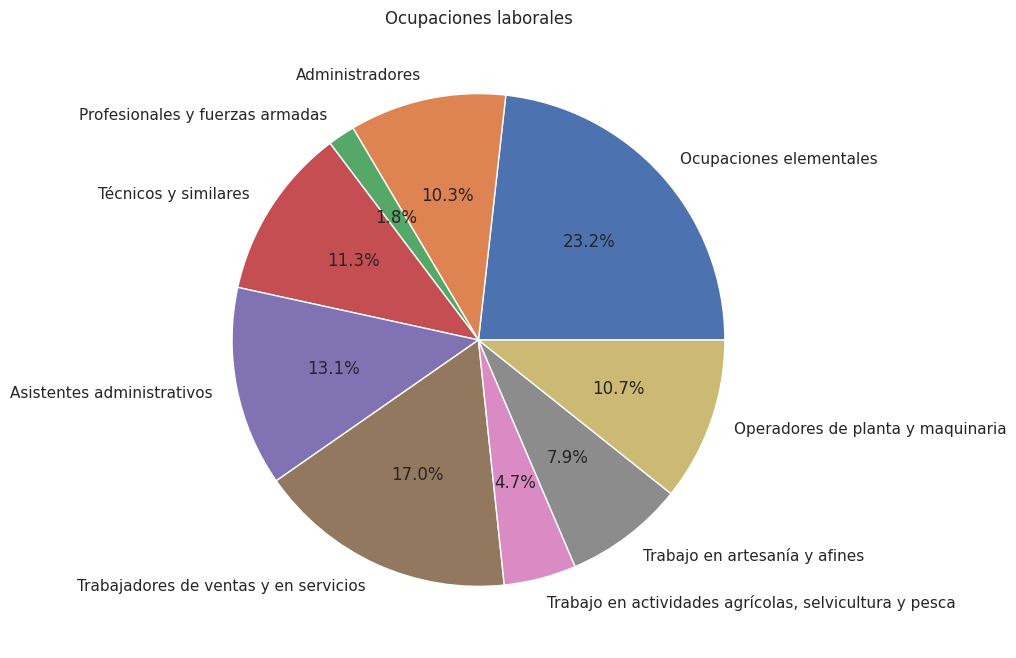

In [26]:
base = df.groupby('labor').size()
base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%')  # Agregar el formato de porcentaje
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

----
## Dona

<ipython-input-27-e9c5d79e8f7b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base2 = df.groupby([ 'sector' ]).count()


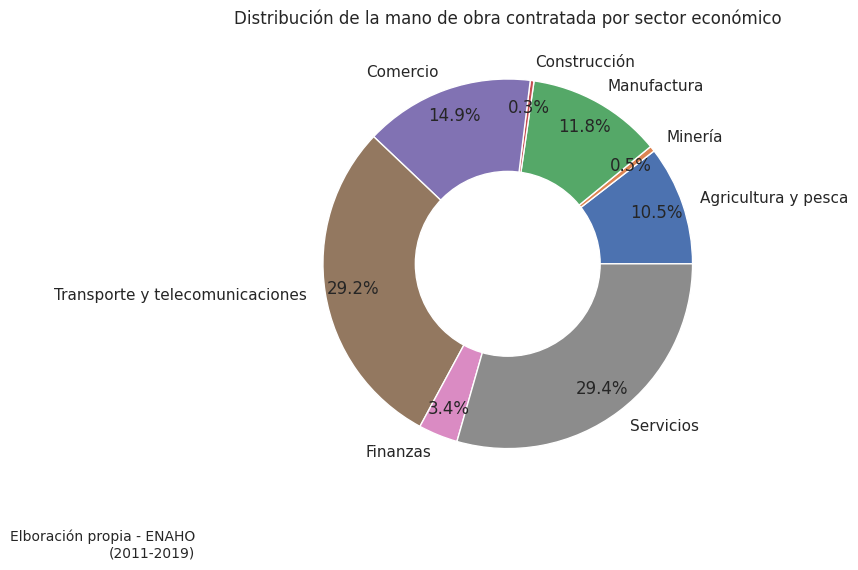

In [27]:
base2 = df.groupby([ 'sector' ]).count()

labels=['Agricultura y pesca','Minería','Manufactura','Construcción','Comercio','Transporte y telecomunicaciones', 'Finanzas', 'Servicios']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['conglome'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)

# centroid size and color

center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.title('Distribución de la mano de obra contratada por sector económico')

# Adding notes

txt="Elboración propia - ENAHO (2011-2019)"
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

---
## Distribuciones

Los gráficos de distribución evalúan visualmente la distribución de los datos de la muestra comparando la distribución empírica de los datos con los valores teóricos esperados de una distribución especificada.

In [28]:
#filter database to 2019
base4 = df[df['year'] == "2019" ]

<Axes: >

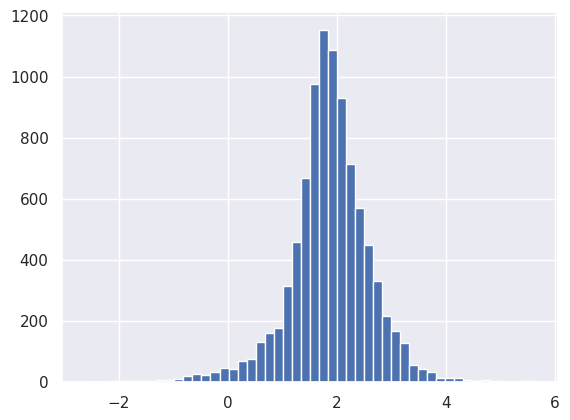

In [29]:
base4.l_salario.hist(bins=50)


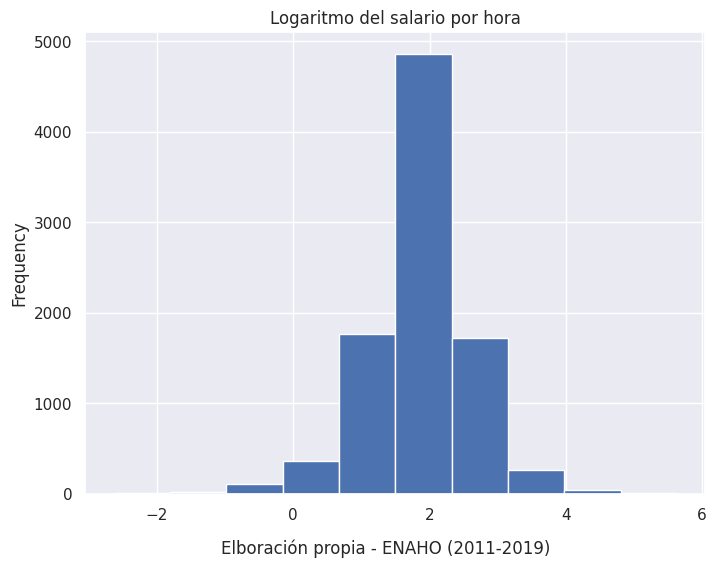

In [30]:
#filter database to 2019
base4 = df[df['year'] == "2019" ]

base4['l_salario'].plot(kind = 'hist', bins = 10, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


### Reduciendo intervalos

Distribución de frecuencias con un intervalo más pequeño (menor frecuencia relativa). Por lo tanto, la altura de cada barra representa una cantidad menor.


In [31]:
base4['l_salario']



,l_salario
142727,0.330982
142728,NaN
142729,NaN
142730,0.136815
142731,NaN
...,...
160767,NaN
160768,1.981469
160769,2.278091
160770,NaN


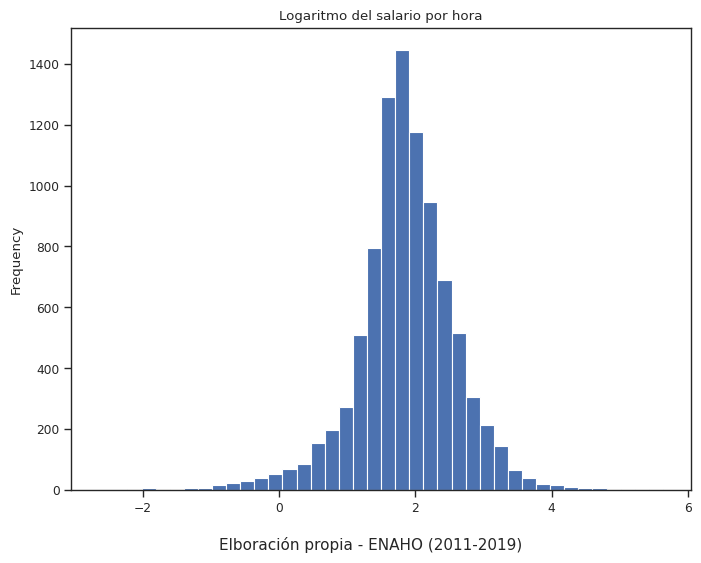

In [32]:


sns.set('paper')
sns.set_style("ticks")

base4['l_salario'].plot(kind = 'hist', bins = 40, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()



---
### Múltiple histogramas



In [ ]:
figure1 = sns.FacetGrid(base4, col="empresa", margin_titles=True)
figure1.map(plt.hist, 'l_salario', bins=np.linspace(0, 20, 30))

### Densidad del salario real por hora:
#### La distribución no se parece a una normal estándar. La información se concentra en los valores más bajos y hay algunas observaciones de valores altos.

<ipython-input-33-d1b8786aee84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base4['salario'], label = "Densidad", color = 'blue')


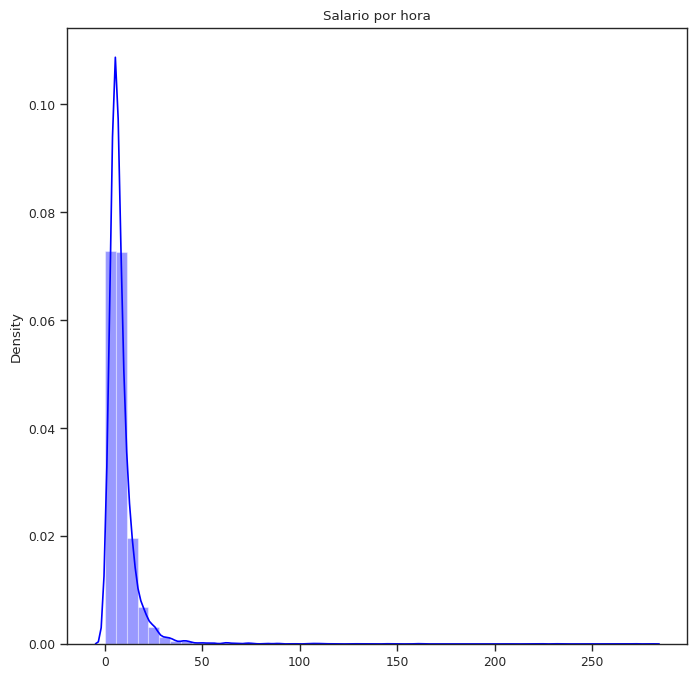

In [33]:
plt.figure(figsize=(8, 8))

sns.distplot(base4['salario'], label = "Densidad", color = 'blue')
plt.title('Salario por hora')
plt.xlabel(' ')
plt.show()


### Logaritmo del salario real por hora
#### Esto permite corregir la asimetría que presentan los datos originales.

<ipython-input-34-0707e6f9dc97>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base4['l_salario'], label = "Densidad", color = 'black')


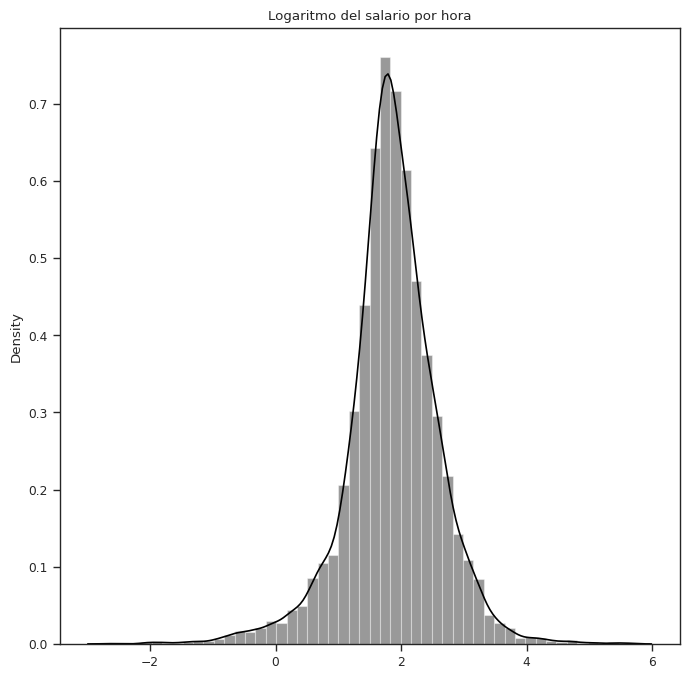

In [34]:

#Alternative figure size
plt.figure(figsize=(8, 8))

sns.distplot(base4['l_salario'], label = "Densidad", color = 'black')
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()


In [ ]:
###
Salarios reales en tres sectores (construcción, minería y servicios)

In [35]:

base4.sector

,sector
142727,"agricultura, selvicultura y pesca"
142728,NaN
142729,NaN
142730,"agricultura, selvicultura y pesca"
142731,NaN
...,...
160767,NaN
160768,"Comercio, hoteles y restaurantes"
160769,"Comercio, hoteles y restaurantes"
160770,NaN


<ipython-input-36-cd1b6e2e4f1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', shade=True, color="blue")
<ipython-input-36-cd1b6e2e4f1c>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes', shade=True, color = "red")
<ipython-input-36-cd1b6e2e4f1c>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería ', shade=True, color="gray")


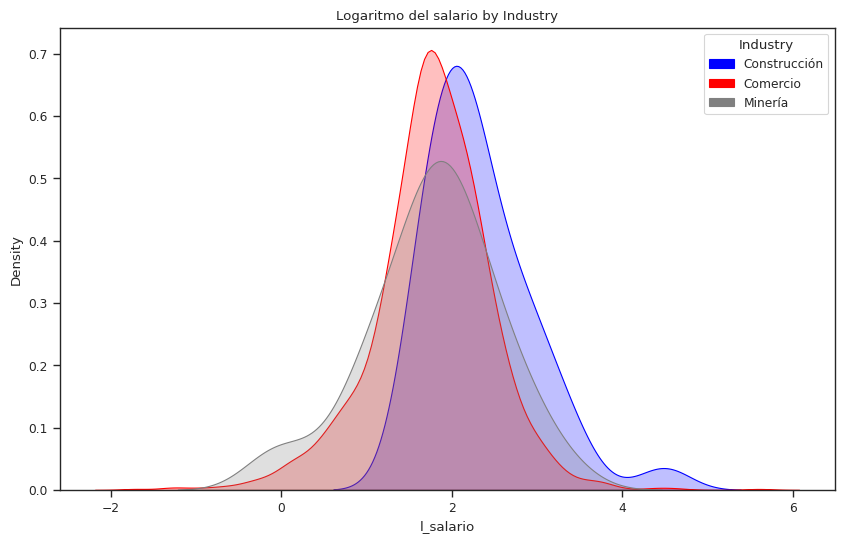

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

#Adding densities

sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', shade=True, color="blue")
sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes', shade=True, color = "red")
sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería ', shade=True, color="gray")
plt.title('Logaritmo del salario by Industry')

# Define custom colors
color1 = 'blue'
color2 = 'red'
color3 = "gray"
# Create legend handles
handle1 = mpatches.Patch(color=color1, label='Construcción')
handle2 = mpatches.Patch(color=color2, label='Comercio')
handle3 = mpatches.Patch(color=color3, label='Minería')

# Manually adding a legend with custom colors
plt.legend(handles=[handle1, handle2, handle3], title='Industry')
# Construction sector shows certain stochastic dominance over mining and services

---
### Ocupaciones laborales y densidades del salario real por hora
Se utiliza un bucle For para incluir en el mismo gráfico la función de densidad de los salarios por hora para diferentes ocupaciones.

<ipython-input-37-65c64d35ef76>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)
<ipython-input-37-65c64d35ef76>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)
<ipython-input-37-65c64d35ef76>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)
<ipython-input-37-65c64d35ef76>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your co

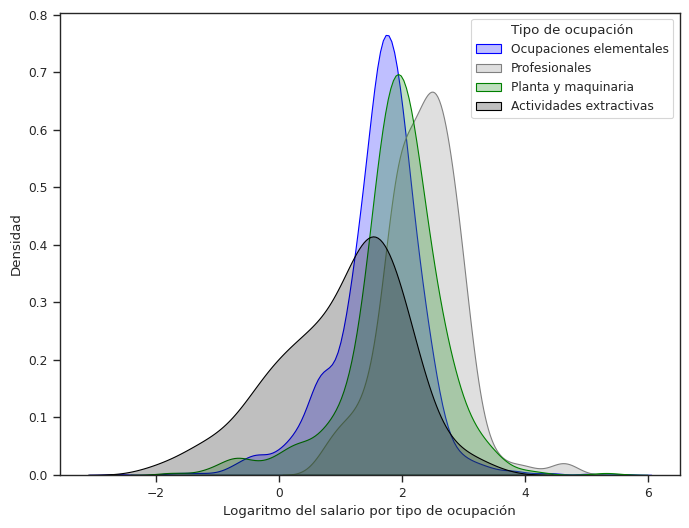

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

sector = [ 'Ocupaciones elementales', 'Profesionales y fuerzas armadas', 'Operadores de planta y maquinaria',
          'Trabajo en actividades agrícolas, selvicultura y pesca']

nombre = [ 'Ocupaciones elementales', 'Profesionales', 'Planta y maquinaria','Actividades extractivas']

color = [ 'blue', 'gray', 'green','black']


for a, b, c in zip(sector, nombre, color):
        sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True, color = c)

plt.xlabel('Logaritmo del salario por tipo de ocupación')

plt.ylabel('Densidad')

# Añadir leyenda
plt.legend(title='Tipo de ocupación')

plt.show()

# Two relevant findings: stochastic dominance of the salary of professionals and
# concentration in lower levels of salary in the non-active primary sector.

### Box plot salario real y educación

<ipython-input-40-df16eaceafa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x="educ", y="l_salario", data=df[df['year'] == "2019" ] ,palette='pastel')
<ipython-input-40-df16eaceafa8>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  (box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))\


[Text(0, 0, 'Sec. completa'),
 Text(1, 0, 'No uni. incompleta'),
 Text(2, 0, 'No uni. completa'),
 Text(3, 0, 'Uni. incompleta'),
 Text(4, 0, 'Uni. completa'),
 Text(5, 0, 'Posgrado')]

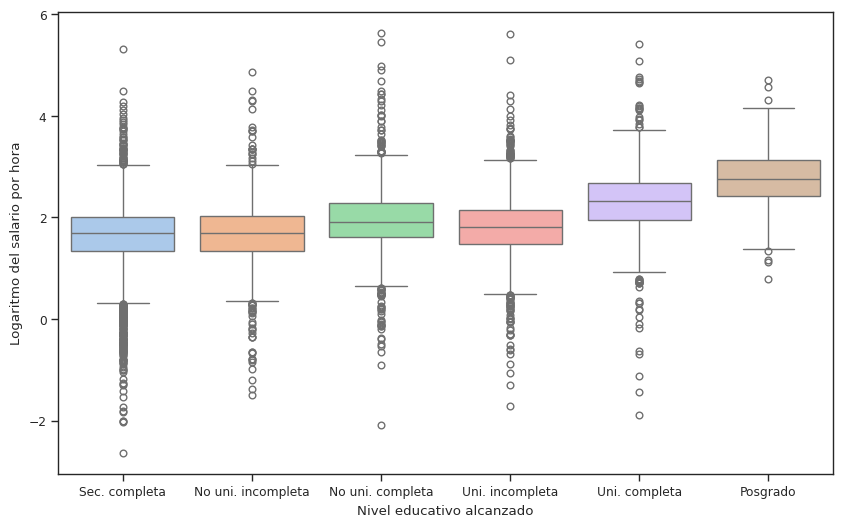

In [40]:

fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="l_salario", data=df[df['year'] == "2019" ] ,palette='pastel')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')
(box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))\

# The real wage quartiles are increasing with the educational level.
# Lower salary dispersion for the postgraduate level. pastel


## Relaciones

Los gráficos se utilizan tanto para series temporales como para datos transversales. Estos gráficos permiten establecer ciertas pruebas de correlación o relaciones entre variables.

**Gráfico de dispersión**
En primer lugar, se extrae una muestra aleatoria de la base de datos original.

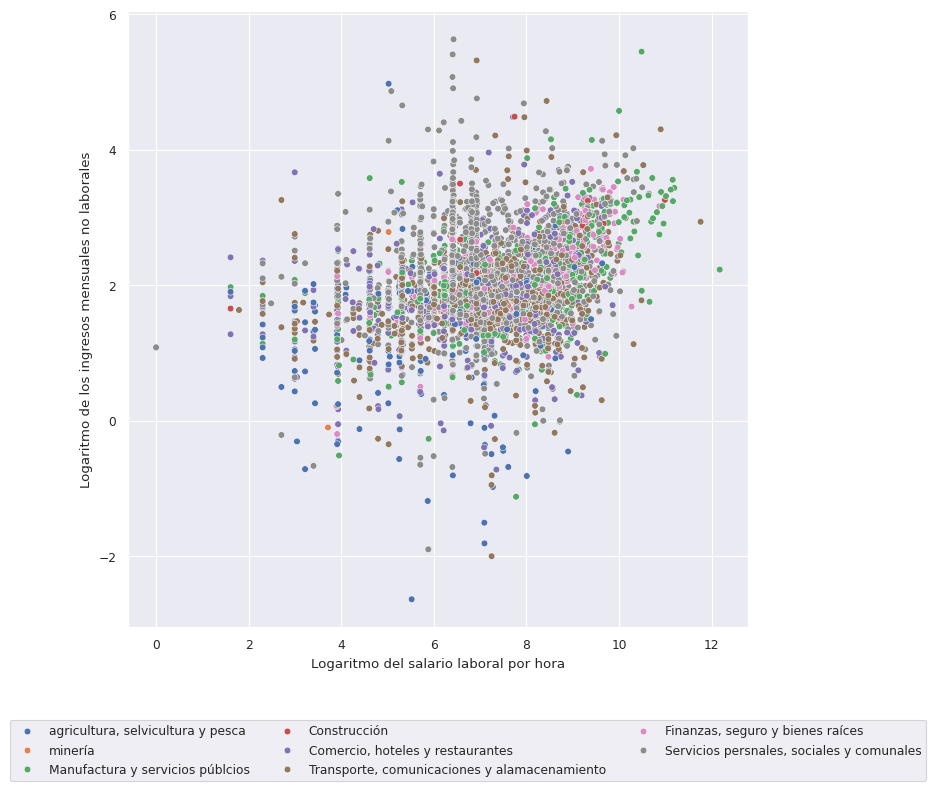

In [41]:
#Full sample

sns.set('paper')
plt.figure(figsize=(8, 8))
plot = sns.scatterplot(data=base4, x="l_n_labor", y="l_salario", hue="sector", palette="deep")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

# By default legend inside plot. Following codes allow us to put outside.
# bbox_to_anchor: box location
# ncol: # columns of legend



plot.legend(loc='center left', bbox_to_anchor=(-0.2, -0.2), ncol=3)


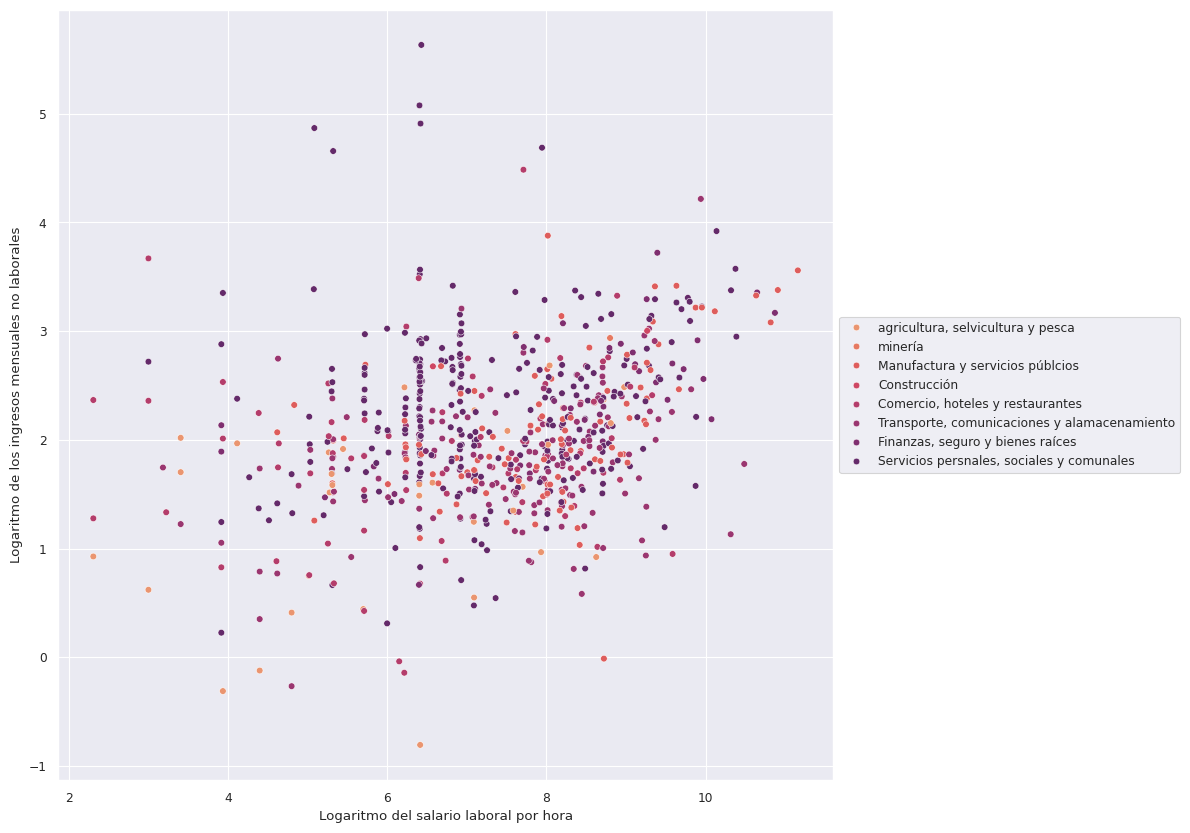

In [43]:

# Ramdon sample n = 3000

base5 = base4.sample(n = 3000)

sns.set('paper')
plt.figure(figsize=(10, 10))
plot = sns.scatterplot(data=base5, x="l_n_labor", y="l_salario", hue="sector", palette="flare")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


Reggresión salario real por hora e ingresos no laborales por estratos \\

s = El tamaño del marcador en puntos**2.

linewidths = «La anchura de línea de los bordes del marcador».

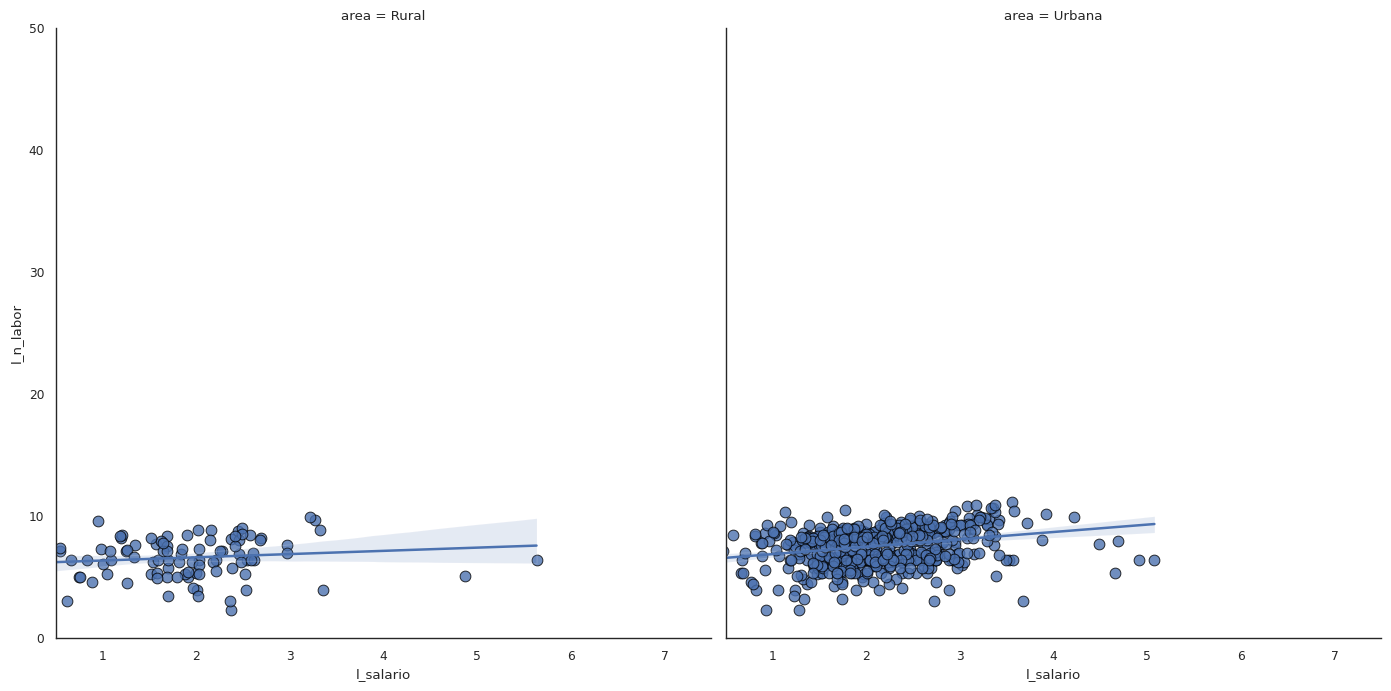

In [44]:

sns.set_style("white")
gridobj = sns.lmplot(x="l_salario", y="l_n_labor",
                     data=base5,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="area",
                     scatter_kws=dict(s=60, linewidths=0.7, edgecolors='black'))

gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()


<Axes: xlabel='l_salario', ylabel='l_n_labor'>

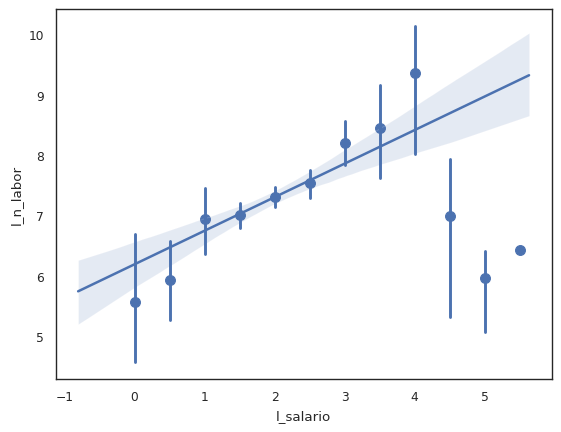

In [47]:
import numpy as np

sns.regplot(data=base5, x="l_salario", y="l_n_labor", x_bins=np.arange(0, 7, 0.5), order=1)
